In [14]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#read in file
df = pd.read_csv("../data/stroke_data_raw.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [28]:
#check size and contents of data
print(df.shape)
df.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#check for null data
df.info()

#since we have a large amount of data, dropping all rows without a bmi count might be favorable.
#setting age to an integer Dtype can make the dataset more readable, seeing that none of the age values have a significant decimal.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

#it appears that our age column has an extremely wide range [0.08, 82]. having a lower bound this low can confuse a machine
#learning model in the future.

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [65]:
plt.style.use('fivethirtyeight')

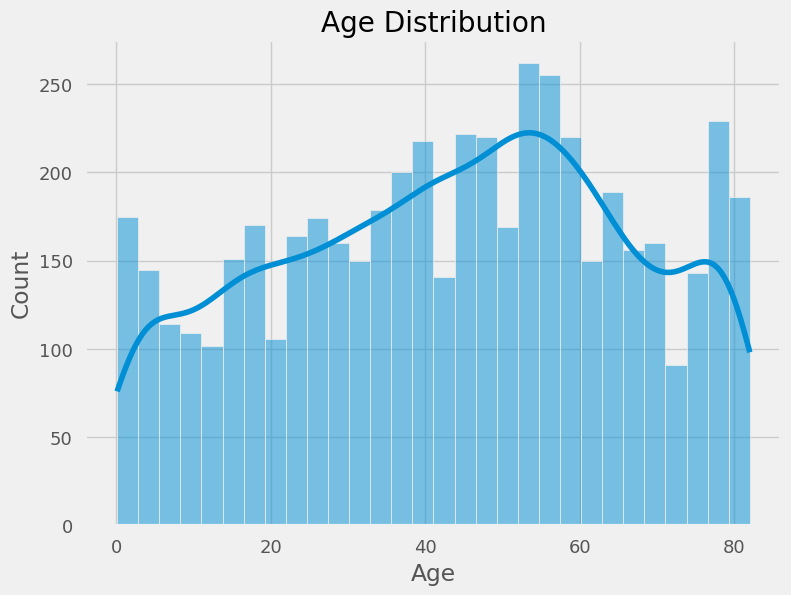

In [69]:
#visualize age distribution
plt.figure(figsize= (8, 6))
sns.histplot(df['age'], bins=30, kde= True)
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#our data contains a diverse amount of data from all age groups.

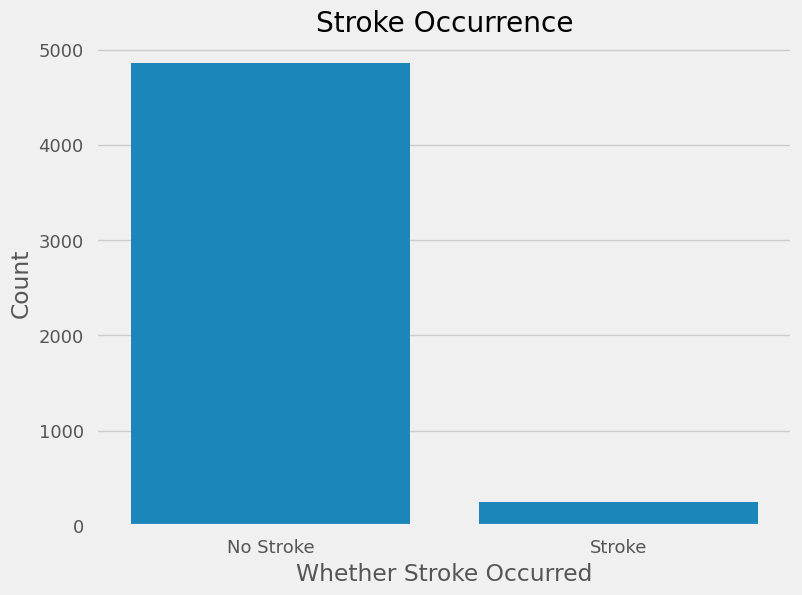

(4861, 249) <- YES to NO count
(95.1, 4.9) <- % YES to % NO count


In [ ]:
#number of strokes
plt.figure(figsize= (8, 6))
sns.countplot(x='stroke', data=df)
plt.title('Stroke Occurrence')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.xlabel("Whether Stroke Occurred")
plt.ylabel("Count")
plt.show()

#a majority of people in our dataset has not experienced a stroke. this amount to be exact:
stroke_yes = df[df['stroke'] == 1].shape[0]
stroke_no = df[df['stroke'] == 0].shape[0]

print(f"({stroke_no}, {stroke_yes}) <- YES to NO count")

#the percentages are:
total = stroke_yes + stroke_no
percent_yes = round(float(stroke_yes / total) * 100, 1)
percent_no = round(float(stroke_no / total) * 100, 1)

print(f"({percent_no}, {percent_yes}) <- % YES to % NO count")

2128    97.6
4209    92.0
928     78.0
544     71.9
1559    66.8
        ... 
5039     NaN
5048     NaN
5093     NaN
5099     NaN
5105     NaN
Name: bmi, Length: 5110, dtype: float64


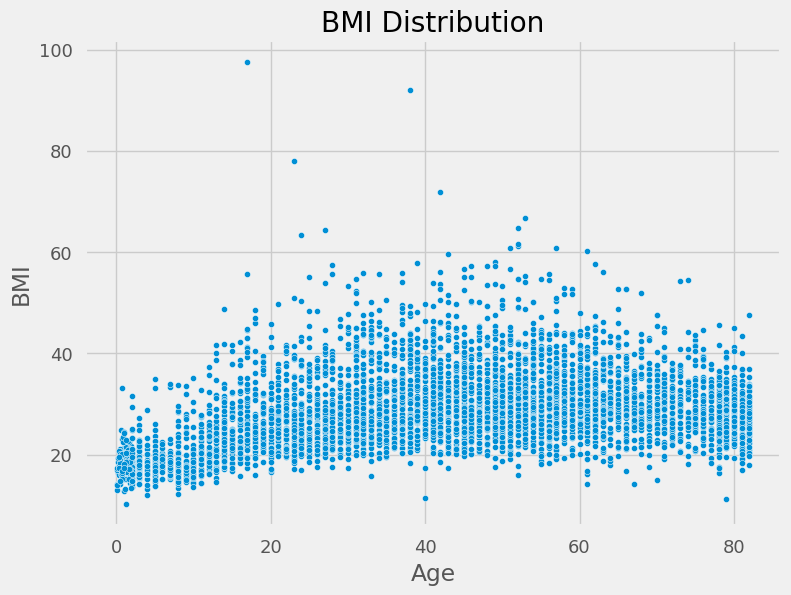

In [ ]:
#bmi distribution
print(df['bmi'].sort_values(ascending= False))

plt.figure(figsize= (8, 6))
sns.scatterplot(data = df, x= 'age', y= 'bmi', s=20)
plt.title('BMI Distribution')
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

In [ ]:
#bmi in relationship to reported strokes

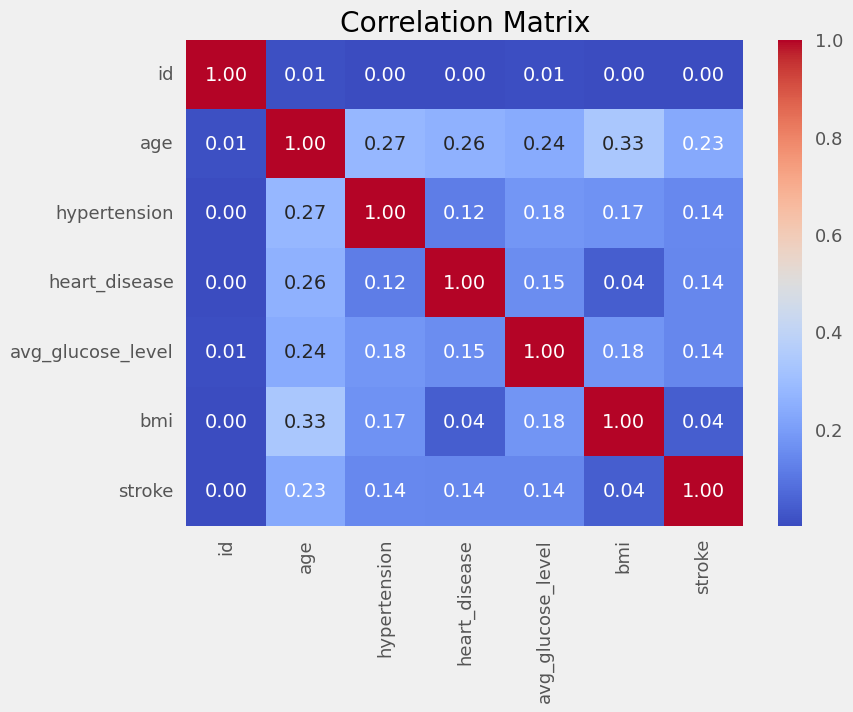

In [80]:
#see correlation between different values
# plot this using a dataframe without NaNs to retain accuracy
df_clr_null = df.dropna(subset= 'bmi')


plt.figure(figsize=(8, 6))
sns.heatmap(df_clr_null.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()